# Chapter 10 Electrodynamics

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

## 10.4 Electric Potential

Rather than considering the force associated with an electric field ${\bf E}({\bf r})$ we can define the electric potential $V({\bf r})$ by

$${\bf E}({\bf r}) = - \nabla V({\bf r})$$

For a point charge $q$ relative to a zero potential at infinity then

$$ V({\bf r}) = \frac{q}{r}$$

where $r$ is the magnitude of ${\bf r}$.

In [946]:
charges = pd.DataFrame([
           {'x': 3, 'y': 3, 'q': 1},
           {'x': 2, 'y': 1, 'q': -1},
           {'x': 4, 'y': 1, 'q': 1} 
           ] )
charges

,x,y,q
0,3,3,1
1,2,1,-1
2,4,1,1


In [947]:
dx = dy = 0.01
xmax = 6
ymax = 4
X, Y = np.mgrid[0:xmax:dx, 0:ymax:dy]

In [948]:
def calculate_V(X, Y, charges):

    V = np.zeros_like(X)
    for charge in charges.itertuples():
        dr_x = X - charge.x
        dr_y = Y - charge.y
        r = np.sqrt(dr_x**2 + dr_y**2)
        V += charge.q / r
    
    return V

In [949]:
V = calculate_V(X, Y, charges)

<ipython-input-948-d5060afc1f9c>:8: RuntimeWarning: divide by zero encountered in true_divide
  V += charge.q / r


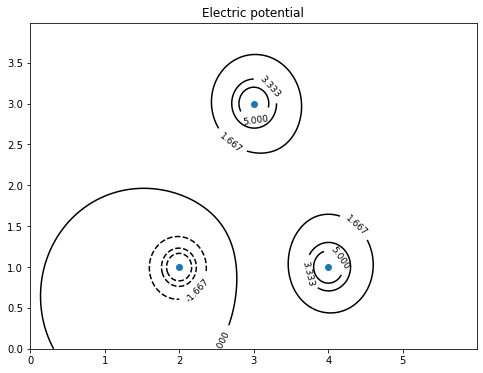

In [950]:
fig, ax = plt.subplots(figsize=(8, 6))
CS = ax.contour(X, Y, V, 
                np.mgrid[-5:5:7j],
                colors='k',  # negative contours will be dashed by default
                )
ax.clabel(CS, fontsize=9, inline=1)
ax.set_title('Electric potential')

ax.scatter(charges.x, charges.y)
plt.show()

## 10.5  Numerical Solutions of Boundary Value Problems

Suppose we do not know the positions of charges but instead only know the potential on a set of boundaries surrounding a charge-free region.

By Gauss's law, for a region that contains no charges

$$ \nabla \cdot {\bf E} = 0$$

so

$$ \nabla ^2 V (x, y, z) = \frac{\partial^2V}{\partial x^2}+\frac{\partial^2V}{\partial y^2}+\frac{\partial^2V}{\partial z^2} = 0$$

This equation is called Laplace's equation and is an example of a *boundary value* problem.

To solve this problem numerically (in 2-D), consider the second-order Taylor expansions

$$\begin{align}
V(x + \Delta x, y) &= V(x, y) + \Delta x \frac{\partial V(x, y)}{\partial x} + \frac{1}{2}(\Delta x)^2 \frac{\partial^2 V(x, y)}{\partial x^2} + \ldots \\
V(x, y + \Delta y) &= V(x, y) + \Delta y \frac{\partial V(x, y)}{\partial y} + \frac{1}{2}(\Delta y)^2 \frac{\partial^2 V(x, y)}{\partial y^2} + \ldots \\
V(x - \Delta x, y) &= V(x, y) - \Delta x \frac{\partial V(x, y)}{\partial x} + \frac{1}{2}(\Delta x)^2 \frac{\partial^2 V(x, y)}{\partial x^2} + \ldots \\
V(x, y - \Delta y) &= V(x, y) - \Delta y \frac{\partial V(x, y)}{\partial y} + \frac{1}{2}(\Delta y)^2 \frac{\partial^2 V(x, y)}{\partial y^2} + \ldots \\
\end{align}$$

Upon summation we get

$$ V(x + \Delta x, y) + V(x, y + \Delta y) + V(x - \Delta x,y)  + V(x, y + \Delta y)  = 4 V(x, y) + \mathcal{O}(\Delta x^2 + \Delta y^2) $$

or

$$ V(x, y) \approx  \frac{1}{4} [ V(x + \Delta x, y) + V(x, y + \Delta y) + V(x - \Delta x,y)  + V(x, y + \Delta y) ] $$

For a particular numerical problem we can consider a closed surface that divides space into an interior and exterior region. We assume we know (as a given boundary condition) the potential at all points. 

We can solve for the potential within the region with an approach known as a *relaxation method*:

1. Divide the region of interest into a rectangular grid spanning the region.  The region is enclosed by a surface (a curve in two dimensions) with specified values of the potential along the curve.

2. Assign to a boundary site the potential of the boundary nearest the site.

3. Assign all interior sites an arbitrary potential (preferably a reasonable guess).

4. Compute new values for the potential $V$ for each interior site. Each new value is obtained by finding the average of the previous values of the potential at the four nearest neighbor sites.

5. Repeat step (4) using the values of $V$ obtained in the previous iteration. This iterative process is continued until the potential at each interior site is computed to the desired accuracy.

### Example 1

In [952]:
N = 20

isConductor = np.zeros((N, N), dtype=bool)
V = np.zeros((N, N), dtype=float)

isConductor[0, :] = True
isConductor[-1, :] = True
isConductor[:, 0] = True
isConductor[:, -1] = True

V[N//3, 5:-5] = 100
isConductor[N//3, 5:-5] = True
V[2*N//3, 5:-5] = -100
isConductor[2*N//3, 5:-5] = True

step = 0

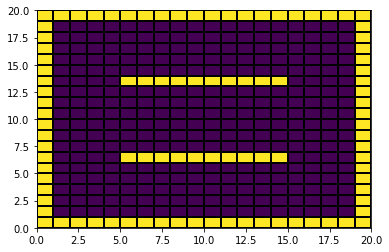

In [953]:
plt.pcolormesh(isConductor, edgecolor='k')

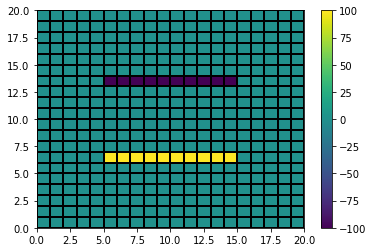

In [954]:
plt.pcolormesh(V, edgecolor='k')
plt.colorbar()

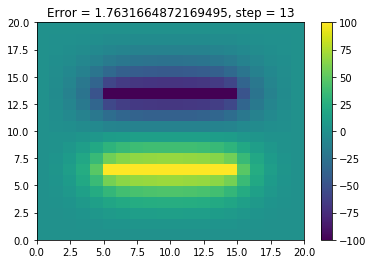

In [967]:
error = 0
newV = V.copy()
for i in range(1, N-1):
    for j in range(1, N-1):
        if not isConductor[i, j]:
            v = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1])/4
            dv = V[i, j] - v
            error = max(error, abs(dv))
            newV[i, j] = v
V = newV
step += 1

plt.pcolormesh(V)
plt.colorbar()
plt.title(f'Error = {error}, step = {step}')
plt.show()

### Example 2

In [1010]:
N = 30

isConductor = np.zeros((N, N), dtype=bool)
V = np.zeros((N, N), dtype=float)

isConductor[0, :] = True
V[0, :] = 10
isConductor[-1, :] = True
V[-1, :] = 10
isConductor[:, 0] = True
V[:, 0] = 10
isConductor[:, -1] = True
V[:, -1] = 10

# intial guess
#V[1:-1, 1:-1] = 9
V[N//2, N//2] = 99

step = 0

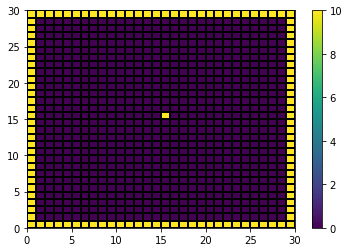

In [1011]:
plt.pcolormesh(V, edgecolor='k', vmin=0, vmax=10)
plt.colorbar()

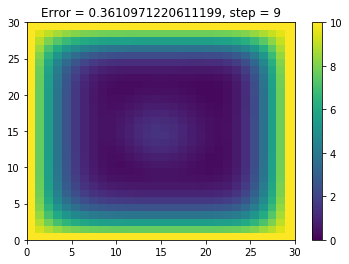

In [1027]:
error = 0

for i in range(1, N-1):
    for j in range(1, N-1):
        if not isConductor[i, j]:
            v = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1])/4
            dv = V[i, j] - v
            error = max(error, abs(dv))
            V[i, j] = v
step += 1

plt.pcolormesh(V, edgecolor=None, vmin=0, vmax=10)
plt.colorbar()
plt.title(f'Error = {error}, step = {step}')
plt.show()

Relaxation, diffusion

## Jacobi Method

This method is called the Jacobi method.  This relaxation method converges very slowly.

In [1017]:
def Jacobi(N=10, maxError=1e-4):

    # setup
    isConductor = np.zeros((N, N), dtype=bool)
    V = np.zeros((N, N), dtype=float)

    isConductor[0, :] = True
    V[0, :] = 10
    isConductor[-1, :] = True
    V[-1, :] = 10
    isConductor[:, 0] = True
    V[:, 0] = 10
    isConductor[:, -1] = True
    V[:, -1] = 10
    
    step = 0
    
    while True:
        # relax
        error = 0
        
        newV = V.copy()
        for i in range(1, N-1):
            for j in range(1, N-1):
                if not isConductor[i, j]:
                    v = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1])/4
                    dv = V[i, j] - v
                    error = max(error, abs(dv))
                    newV[i, j] = v
        V = newV
        step += 1

        yield({'step': step, 'error': error})
        
        if error < maxError:
            break

Text(0, 0.5, 'error')

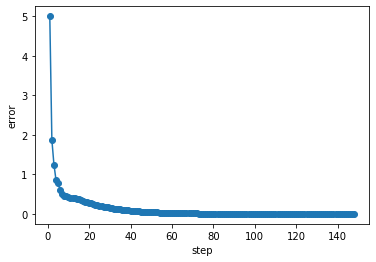

In [1018]:
df = pd.DataFrame(Jacobi(N=10))
plt.plot(df.step, df.error, 'o-')
plt.xlabel('step')
plt.ylabel('error')

### Gauss-Seidel relaxation

Update each lattice site immediately.

In [930]:
def GaussSeidel(N=10, maxError=1e-4):

    # setup
    isConductor = np.zeros((N, N), dtype=bool)
    V = np.zeros((N, N), dtype=float)

    isConductor[0, :] = True
    V[0, :] = 10
    isConductor[-1, :] = True
    V[-1, :] = 10
    isConductor[:, 0] = True
    V[:, 0] = 10
    isConductor[:, -1] = True
    V[:, -1] = 10
    
    step = 0
    
    while True:
        # relax
        error = 0
        for i in range(1, N-1):
            for j in range(1, N-1):
                if not isConductor[i, j]:
                    v = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1])/4
                    dv = V[i, j] - v
                    error = max(error, abs(dv))
                    V[i, j] = v
        step += 1

        yield({'step': step, 'error': error})
        
        if error < maxError:
            break

Text(0, 0.5, 'error')

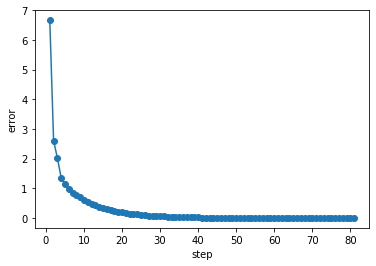

In [931]:
df = pd.DataFrame(GaussSeidel(N=10))
plt.plot(df.step, df.error, 'o-')
plt.xlabel('step')
plt.ylabel('error')

#### Update alternate points

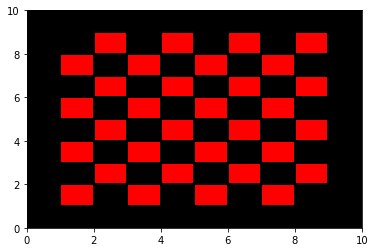

In [832]:
from matplotlib.colors import ListedColormap

cmap = ListedColormap(['k', 'r'])

plt.figure()
V = np.zeros((N, N))
for i in range(1, N-1):
    jstart = 1 if i%2 else 2
    for j in range(jstart, N-1, 2):
        V[i, j] = 1
plt.pcolormesh(V, edgecolor='k', cmap=cmap)

In [1028]:
def RedBlack(N=10, maxError=1e-4):

    # setup
    isConductor = np.zeros((N, N), dtype=bool)
    V = np.zeros((N, N), dtype=float)

    isConductor[0, :] = True
    V[0, :] = 10
    isConductor[-1, :] = True
    V[-1, :] = 10
    isConductor[:, 0] = True
    V[:, 0] = 10
    isConductor[:, -1] = True
    V[:, -1] = 10
    
    step = 0
    
    while True:
        # relax
        error = 0
        
        # update 'red' squares
        for i in range(1, N-1):
            jstart = 1 if i%2 else 2
            for j in range(jstart, N-1, 2):
                if not isConductor[i, j]:
                    v = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1])/4
                    dv = V[i, j] - v
                    error = max(error, abs(dv))
                    V[i, j] = v
        
        # update 'black' squares
        for i in range(1, N-1):
            jstart = 2 if i%2 else 1
            for j in range(jstart, N-1, 2):
                if not isConductor[i, j]:
                    v = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1])/4
                    dv = V[i, j] - v
                    error = max(error, abs(dv))
                    V[i, j] = v
        
        step += 1
        
        yield({'step': step, 'error': error})
        
        if error < maxError:
            break

Text(0, 0.5, 'error')

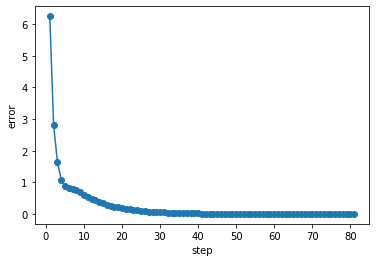

In [1029]:
df = pd.DataFrame(RedBlack(N=10))
plt.plot(df.step, df.error, 'o-')
plt.xlabel('step')
plt.ylabel('error')

In [934]:
rows = []
maxError = 1e-4

for N in [10, 20, 30]:

    df = pd.DataFrame(Jacobi(N=N, maxError=maxError))
    jacobi_steps = len(df)
    df = pd.DataFrame(GaussSeidel(N=N, maxError=maxError))
    gaussseidel_steps = len(df)
    df = pd.DataFrame(RedBlack(N=N, maxError=maxError))
    redblack_steps = len(df)

    rows.append({'N': N, 
                 'Jacobi': jacobi_steps, 
                 'GaussSeidel': gaussseidel_steps, 
                 'RedBlack': redblack_steps})
                
df = pd.DataFrame(rows)

In [935]:
df

,N,Jacobi,GaussSeidel,RedBlack
0,10,148,81,81
1,20,561,308,307
2,30,1167,644,643


## Successive Overrelaxation (SOR)

When updating the potential, we can modify GaussSeidel to use an *overrelaxation* method that updates with

$$ V_{new} (x,y) = w V_{ave}(x, y) + (1-w) V(x, y) $$

In [1030]:
def SOR(N=10, w=1, maxError=1e-4):

    # setup
    isConductor = np.zeros((N, N), dtype=bool)
    V = np.zeros((N, N), dtype=float)

    isConductor[0, :] = True
    V[0, :] = 10
    isConductor[-1, :] = True
    V[-1, :] = 10
    isConductor[:, 0] = True
    V[:, 0] = 10
    isConductor[:, -1] = True
    V[:, -1] = 10
    
    step = 0
    
    while True:
        # relax
        error = 0
        for i in range(1, N-1):
            for j in range(1, N-1):
                if not isConductor[i, j]:
                    v = (V[i-1, j] + V[i+1, j] + V[i, j-1] + V[i, j+1])/4
                    dv = V[i, j] - v
                    error = max(error, abs(dv))
                    V[i, j] = w * v + (1 - w)*V[i, j]
        step += 1

        yield({'step': step, 'error': error})
        
        if error < maxError:
            break

Notice that if $w = 1$ then SOR is equivalent to Gauss-Seidel:

In [941]:
rows = []
maxError = 1e-4

for N in [10, 20, 30]:

    df = pd.DataFrame(GaussSeidel(N=N, maxError=maxError))
    gaussseidel_steps = len(df)
    df = pd.DataFrame(SOR(w=1, N=N, maxError=maxError))
    SOR_steps = len(df)

    rows.append({'N': N, 
                 'GaussSeidel': gaussseidel_steps, 
                 'SOR w=1': SOR_steps})
                
df = pd.DataFrame(rows)
df

,N,GaussSeidel,SOR w=1
0,10,81,81
1,20,308,308
2,30,644,644


In [945]:
rows = []
maxError = 1e-4

for w in np.arange(1, 2.0, 0.1):
    
    row = {'w': w}
    
    for N in [10, 20, 30]:
    
        df = pd.DataFrame(SOR(w=w, N=N, maxError=maxError))
        SOR_steps = len(df)

        row[f'N={N}'] = SOR_steps 
        
    rows.append(row)
                
df = pd.DataFrame(rows)
df

,w,N=10,N=20,N=30
0,1.0,81,308,644
1,1.1,67,254,534
2,1.2,54,210,442
3,1.3,43,171,362
4,1.4,33,138,293
5,1.5,21,108,232
6,1.6,26,80,177
7,1.7,37,52,126
8,1.8,55,56,70
9,1.9,111,115,118


Aside: https://math.la.asu.edu/~gardner/laplace.pdf

See a course on *Numerical Linear Algebra* for more details.